In [1]:
import tensorflow as tf 

2023-06-08 20:57:48.372207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Step #1 Load in data 
Fashion MNIST and CIFAR-10 
MNIST is considered too easy or solved 
still 28 x 28 greyscale 
labels: t-shirt, shoes, pants, ect.
Cifar-10 is 32 x 32 x 3 color 
Labels: automobile, frog, horse, cat, dog

Step #2: Build the model
its just ANN with conv layers
functional API 
Step #3 Train model
Step #4 evaluate the model
Step#5 make predictions 

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Model

In [9]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train shape:', x_train.shape)


x_train shape: (60000, 28, 28)


In [10]:
#converting from 2D to height width and color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
# number of classes 
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [13]:
#building the model using functional API 
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides =2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides =2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides =2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation= 'softmax')(x)

model = Model(i, x)

In [14]:
#compile and fit CPU is slow so use GPU if needed
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5277 - accuracy: 0.8037 - val_loss: 0.4056 - val_accuracy: 0.8491
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3660 - accuracy: 0.8637 - val_loss: 0.3504 - val_accuracy: 0.8705
Epoch 3/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3158 - accuracy: 0.8808 - val_loss: 0.3182 - val_accuracy: 0.8848
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2811 - accuracy: 0.8951 - val_loss: 0.3140 - val_accuracy: 0.8859
Epoch 5/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2558 - accuracy: 0.9036 - val_loss: 0.2984 - val_accuracy: 0.8908
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2355 - accuracy: 0.9111 - val_loss: 0.2945 - val_accuracy: 0.8950
Epoch 7/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2148 - accuracy: 0.9189 - val_loss: 0.2996 -

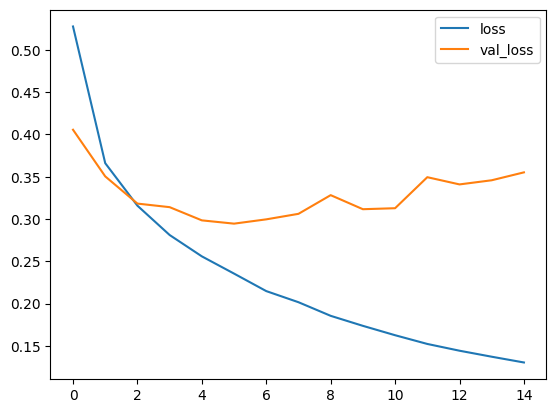

In [17]:
#plot the loss per iteration 
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

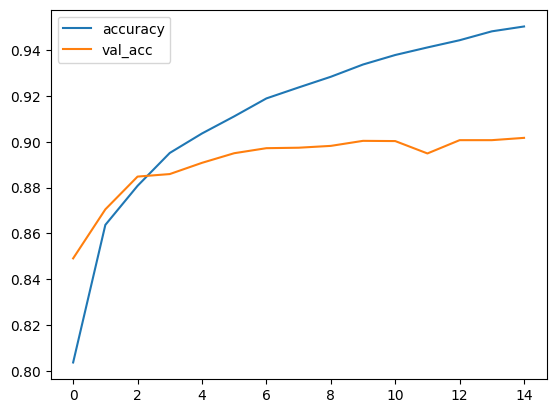

In [18]:
#plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

models with multiple inputs/outputs are easier to use:
model = Model(input=[i1, i2, i3], outputs=[o1, o2, o3])

313/313 [==============================] - 2s 6ms/step
confusion matrix without normalization
[[853   0  17  20   3   3 100   0   4   0]
 [  4 977   1  14   2   0   1   0   1   0]
 [ 19   1 834  14  48   0  82   0   2   0]
 [ 10  10  12 925  18   0  24   0   1   0]
 [  2   0  46  37 825   1  84   0   5   0]
 [  0   0   0   0   0 977   0  19   0   4]
 [119   0  46  30  75   2 717   0  11   0]
 [  0   0   0   0   0   6   0 982   0  12]
 [  6   1   3   6   2   5   2   5 970   0]
 [  1   0   0   0   0   7   0  35   0 957]]


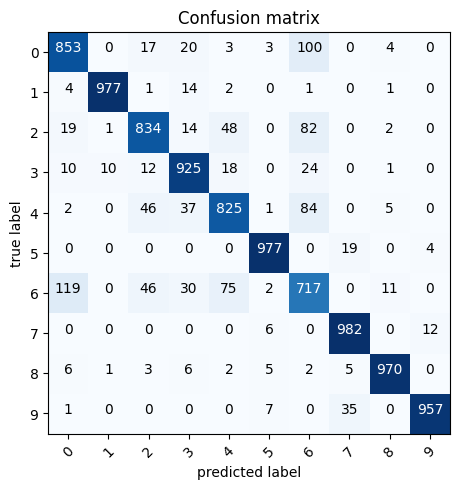

In [20]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment= 'center',
                 color = 'white' if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel('predicted label')
    plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [22]:
#label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

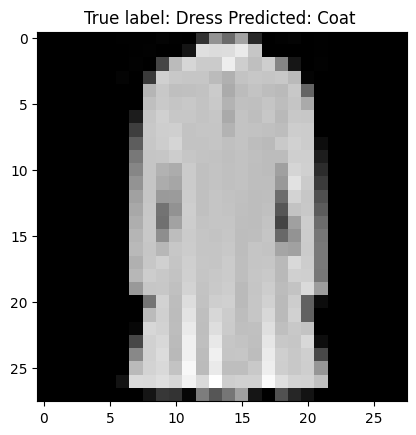

In [23]:
#see where it misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));